In [28]:
##Load Libaraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')
2

2

In [29]:
##Load Data
dataset = pd.read_csv("adult.csv")

# Check for Null Data
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [30]:
# Replace All Null Data in NaN
dataset = dataset.fillna(np.nan)

In [31]:
# Get data types
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [12]:
# Peek at data
dataset.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [32]:
# Reformat Column We Are Predicting
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
dataset.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


In [33]:
##Analyze Data
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

AttributeError: module 'seaborn' has no attribute 'plt'

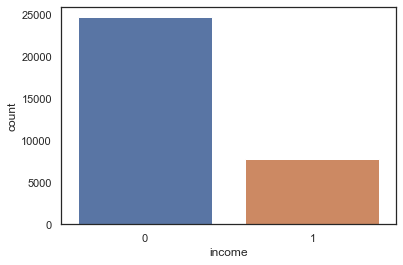

In [34]:
#Numeric Data Analysis
# Count of >50K & <=50K
sns.countplot(dataset['income'],label="Count")
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

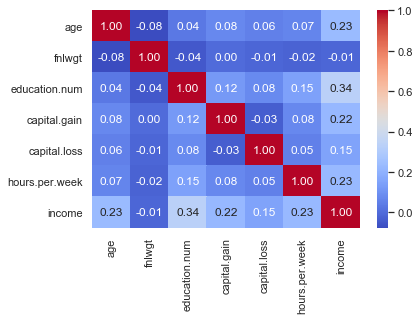

In [26]:
# Correlation matrix between numerical values
g = sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
sns.plt.show()

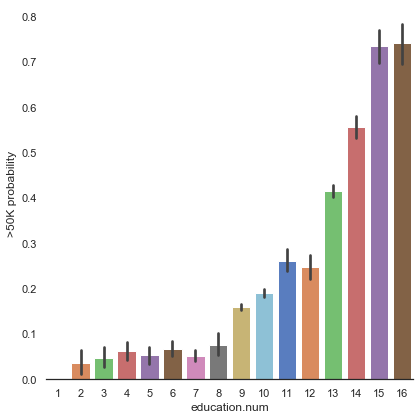

In [35]:
# Explore Education Num vs Income
g = sns.catplot(x="education.num",y="income",data=dataset,kind="bar",height = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

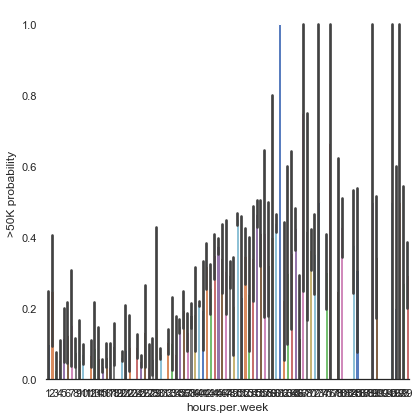

In [39]:
# Explore Hours Per Week vs Income
g  = sns.catplot(x="hours.per.week",y="income",data=dataset,kind="bar",height = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

AttributeError: module 'seaborn' has no attribute 'plt'

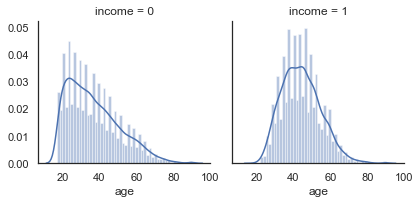

In [40]:
# Explore Age vs Income
g = sns.FacetGrid(dataset, col='income')
g = g.map(sns.distplot, "age")
sns.plt.show()

In [41]:
#Categorical Data Analysis
# Fill Missing Category Entries
dataset["workclass"] = dataset["workclass"].fillna("X")
dataset["occupation"] = dataset["occupation"].fillna("X")
dataset["native.country"] = dataset["native.country"].fillna("United-States")

# Confirm All Missing Data is Handled
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

AttributeError: module 'seaborn' has no attribute 'plt'

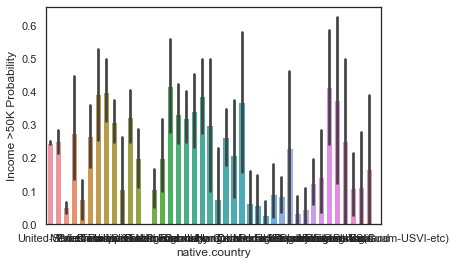

In [42]:
# Explore Native Nation vs Income
g = sns.barplot(x="native.country",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

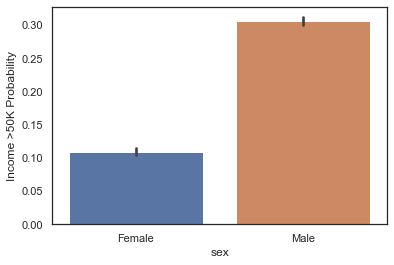

In [43]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

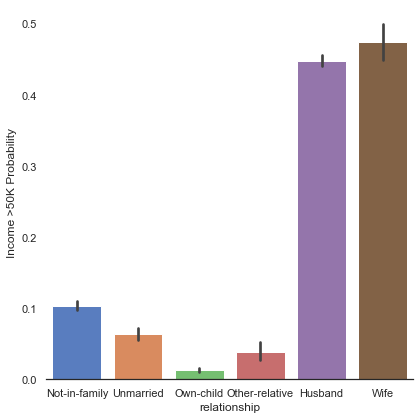

In [46]:
# Explore Relationship vs Income
g = sns.catplot(x="relationship",y="income",data=dataset,kind="bar", height = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

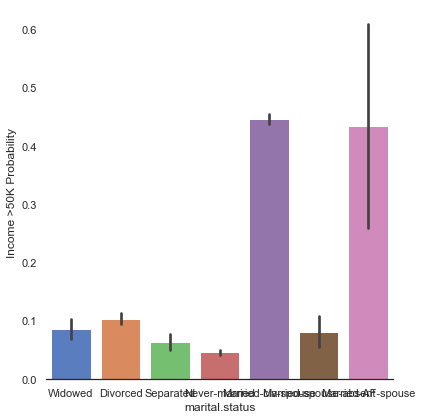

In [48]:
# Explore Marital Status vs Income
g = sns.catplot(x="marital.status",y="income",data=dataset,kind="bar", height = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

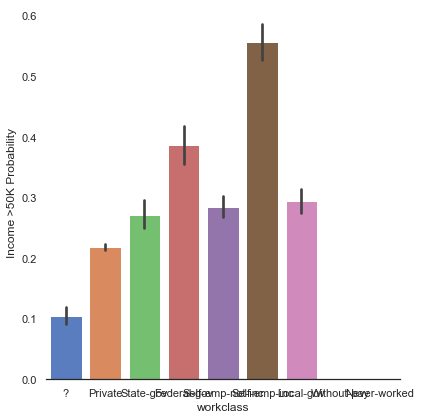

In [49]:
# Explore Workclass vs Income
g = sns.catplot(x="workclass",y="income",data=dataset,kind="bar", height = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
sns.plt.show()

In [50]:
#Feature Engineering
############### FEATURE ENGINEERING ################
####################################################
# Convert Sex value to 0 and 1
dataset["sex"] = dataset["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].map({"Married":1, "Single":0})
dataset["marital.status"] = dataset["marital.status"].astype(int)

# Drop the data you don't want to use
dataset.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(dataset.head())

Dataset with Dropped Labels
   age  fnlwgt  education.num  marital.status  sex  capital.gain  \
0   90   77053              9               0    1             0   
1   82  132870              9               0    1             0   
2   66  186061             10               0    1             0   
3   54  140359              4               0    1             0   
4   41  264663             10               0    1             0   

   capital.loss  hours.per.week  income  
0          4356              40       0  
1          4356              18       0  
2          4356              40       0  
3          3900              40       0  
4          3900              40       0  


In [51]:
#Modeling
###################################################
##################### MODELING #####################
####################################################
# Split-out Validation Dataset and Create Test Variables
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Split Data: X
[[    90  77053      9 ...      0   4356     40]
 [    82 132870      9 ...      0   4356     18]
 [    66 186061     10 ...      0   4356     40]
 ...
 [    40 154374      9 ...      0      0     40]
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]]
Split Data: Y
[0 0 0 ... 1 0 0]


C:\Users\ashenoy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.796836 (0.003727)


C:\Users\ashenoy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.829507 (0.004318)


C:\Users\ashenoy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.774455 (0.005765)


C:\Users\ashenoy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.805782 (0.006481)
NB: 0.794303 (0.003642)


C:\Users\ashenoy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\ashenoy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.842292 (0.005350)


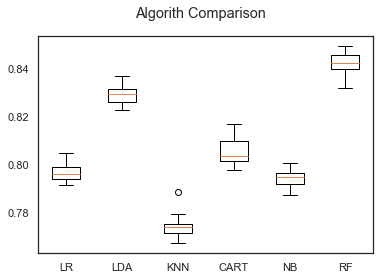

In [52]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [53]:
#Algorithm Tuning
####################################################
################ ALGORITHM TUNING ##################
####################################################
'''
Commented Out to Reduce Script Time - Took 20 Minutes to run.
best n_estimator = 250
best max_feature = 5
# Tune Random Forest
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
'''

'\nCommented Out to Reduce Script Time - Took 20 Minutes to run.\nbest n_estimator = 250\nbest max_feature = 5\n# Tune Random Forest\nn_estimators = np.array([50,100,150,200,250])\nmax_features = np.array([1,2,3,4,5])\nparam_grid = dict(n_estimators=n_estimators,max_features=max_features)\nmodel = RandomForestClassifier()\nkfold = KFold(n_splits=num_folds, random_state=seed)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)\ngrid_result = grid.fit(X_train, Y_train)\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n'

In [54]:
#Finalize Model
####################################################
################# FINALIZE MODEL ###################
####################################################
# 5. Finalize Model
# a) Predictions on validation dataset - KNN
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


Accuracy: 84.46184553968985%
[[4581  383]
 [ 629  920]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4964
           1       0.71      0.59      0.65      1549

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513

